In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('Data/cleaned_marketing_campaign.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Recency_Months
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,69,162
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,72,144
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,61,151
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,42,145
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,45,146


In [2]:
#Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

print("Numeric Columns:", numeric_cols.tolist())
print("Categorical Columns:", categorical_cols.tolist())

Numeric Columns: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Recency_Months']
Categorical Columns: ['Education', 'Marital_Status', 'Dt_Customer']


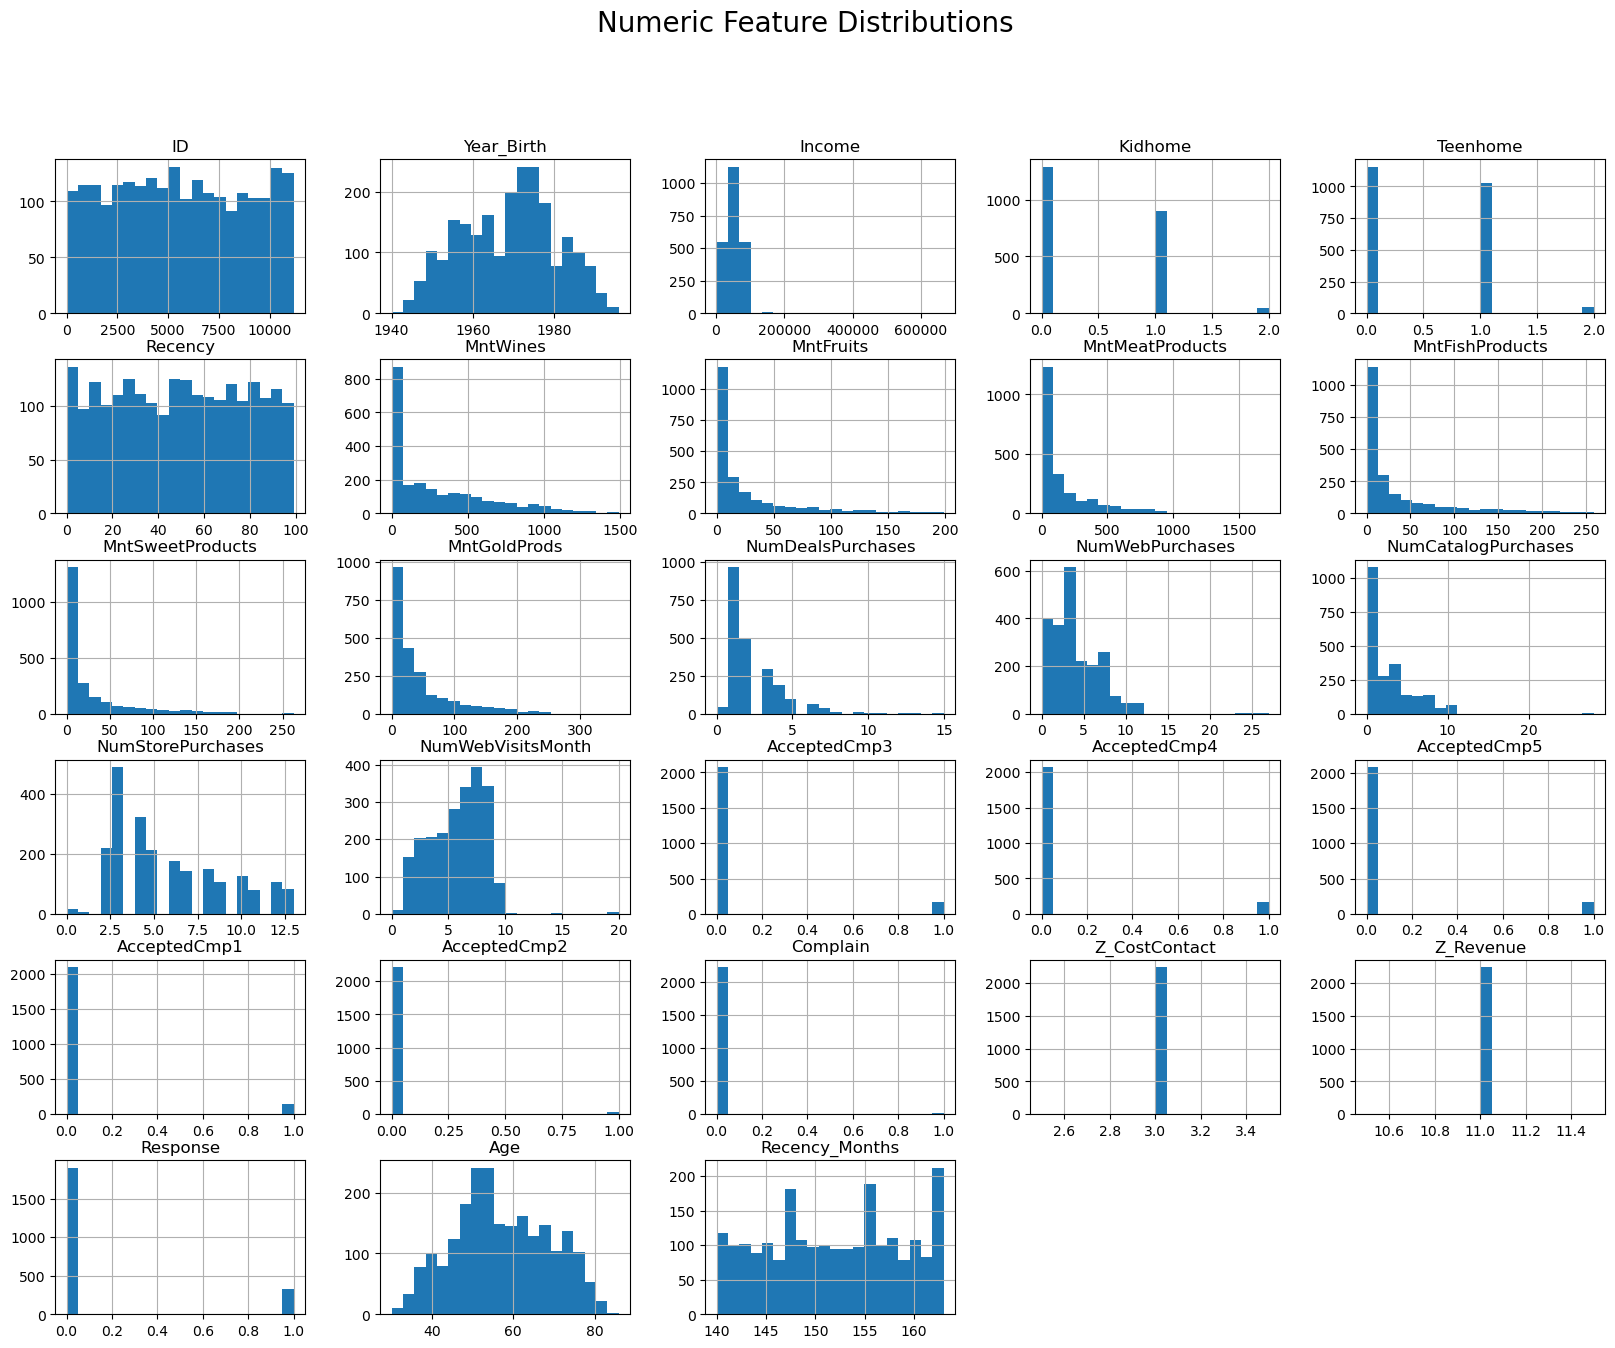

In [3]:
#Explore distributions of numeric features
df[numeric_cols].hist(bins=20, figsize=(20, 15))
plt.suptitle("Numeric Feature Distributions", fontsize=20)
plt.show()


Feature: Education
Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64 



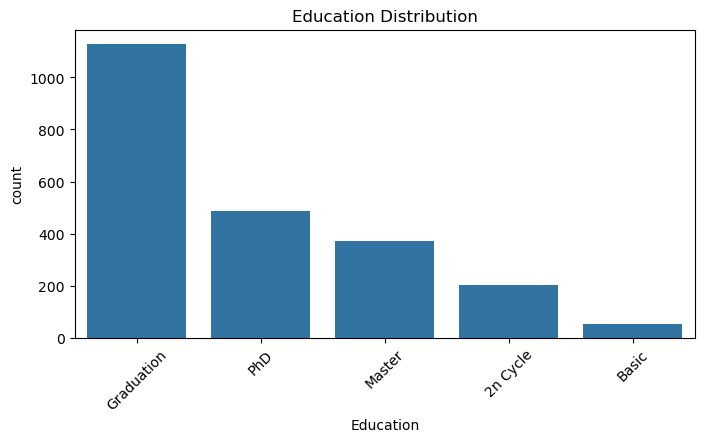

Feature: Marital_Status
Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 



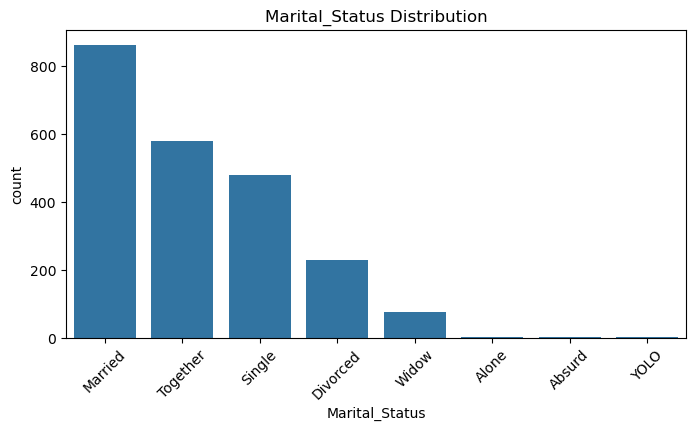

Feature: Dt_Customer (Year-Month aggregated)

Customer_Month
2012-07      2
2012-08    118
2012-09     99
2012-10     95
2012-11     97
2012-12     83
2013-01    107
2013-02    100
2013-03    102
2013-04     88
2013-05    104
2013-06     92
2013-07     99
2013-08    104
2013-09     92
2013-10    117
2013-11     90
2013-12     92
2014-01     90
2014-02     78
2014-03    109
2014-04     94
2014-05    111
2014-06     74
Freq: M, Name: count, dtype: int64 



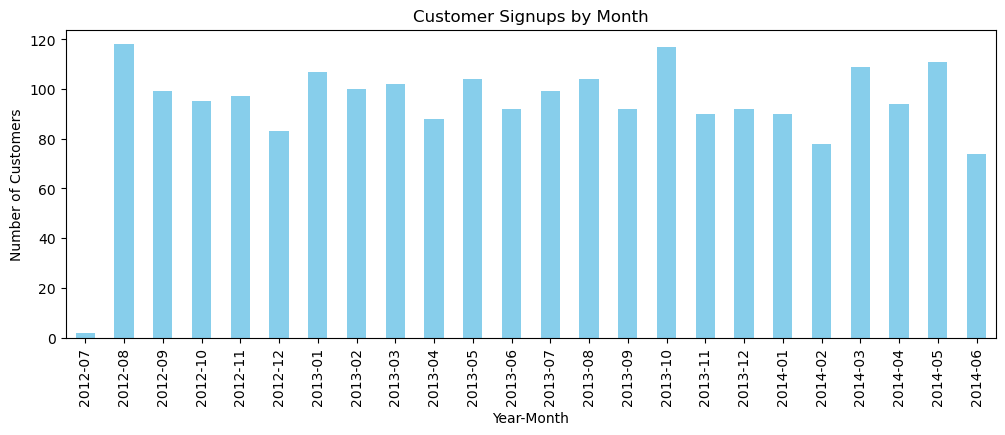

In [4]:
# Ensure Dt_Customer is datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
#Explore categorical features
for col in categorical_cols:
    if col != 'Dt_Customer':
        # Regular categorical columns
        print(f"Feature: {col}")
        print(df[col].value_counts(), "\n")
        
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f"{col} Distribution")
        plt.xticks(rotation=45)
        plt.show()
    else:
        # Dt_Customer handled separately to avoid overcrowded plot
        print("Feature: Dt_Customer (Year-Month aggregated)\n")
        
        df['Customer_Month'] = df['Dt_Customer'].dt.to_period('M')
        month_counts = df['Customer_Month'].value_counts().sort_index()
        print(month_counts, "\n")
        
        plt.figure(figsize=(12,4))
        month_counts.plot(kind='bar', color='skyblue')
        plt.title("Customer Signups by Month")
        plt.xlabel("Year-Month")
        plt.ylabel("Number of Customers")
        plt.xticks(rotation=90)
        plt.show()


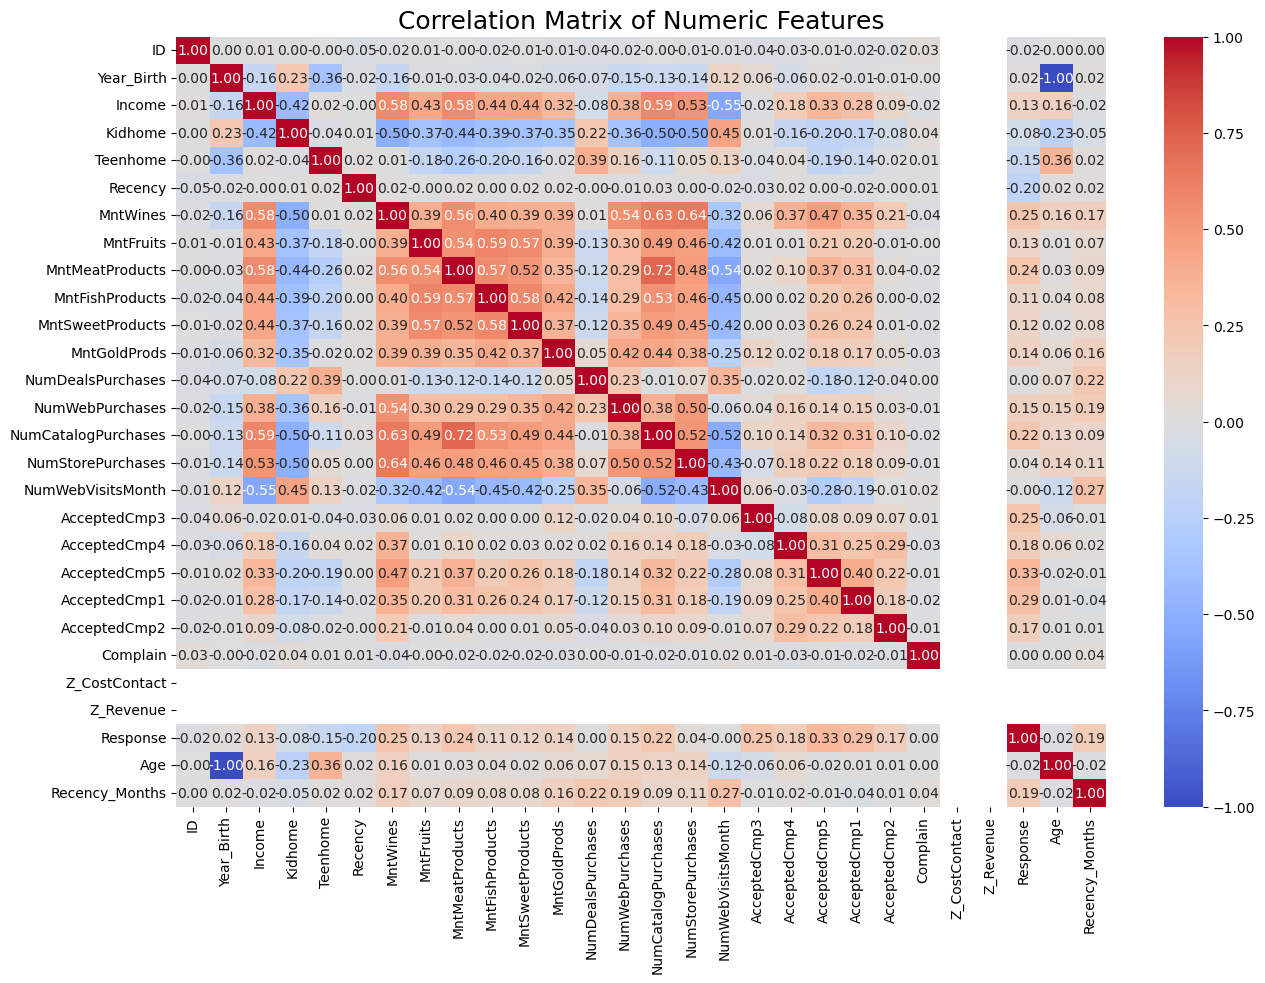

In [5]:
#Correlation matrix for numeric features
corr = df[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features", fontsize=18)
plt.show()


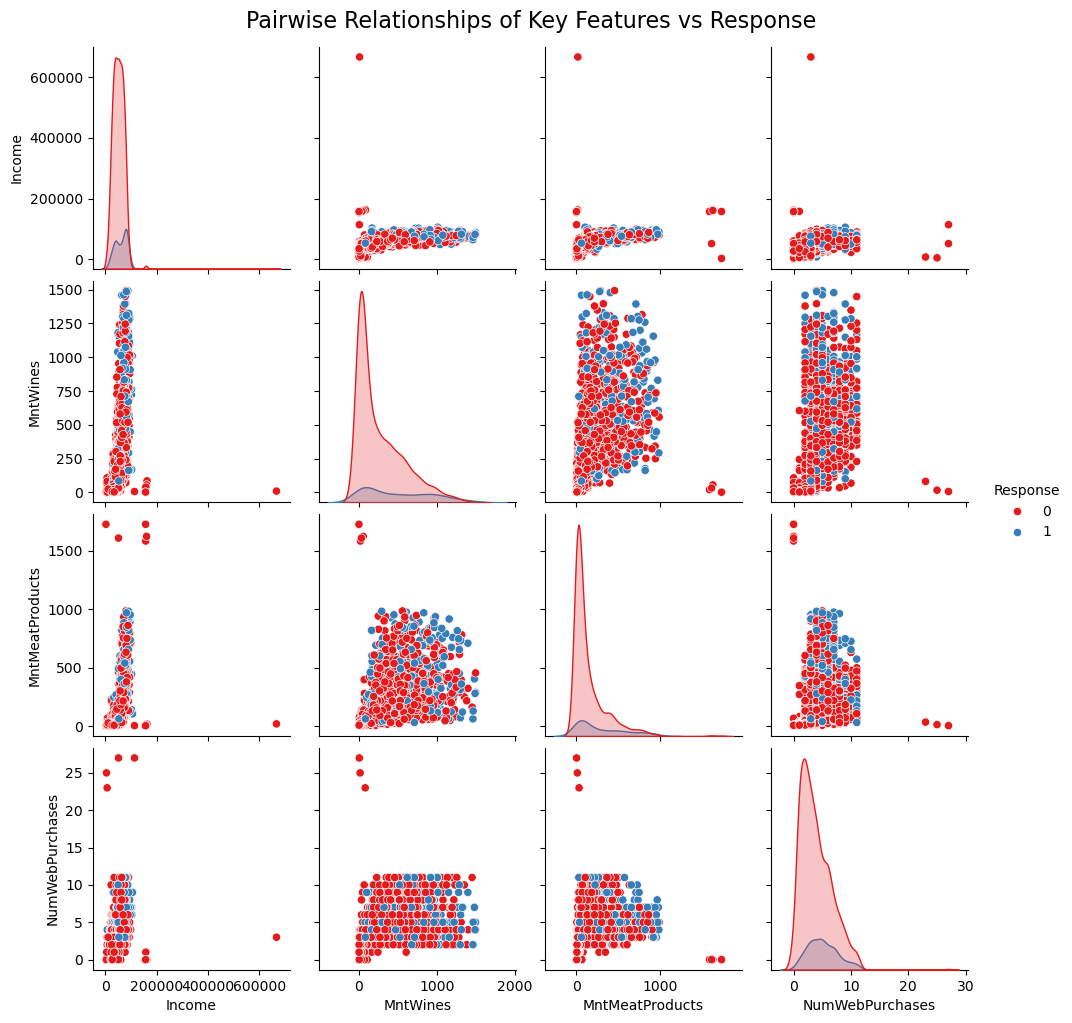

In [6]:
#Scatterplots / pairwise relationships with Response
key_features = ['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases']
sns.pairplot(df, vars=key_features, hue='Response', diag_kind='kde', palette='Set1')
plt.suptitle("Pairwise Relationships of Key Features vs Response", y=1.02, fontsize=16)
plt.show()


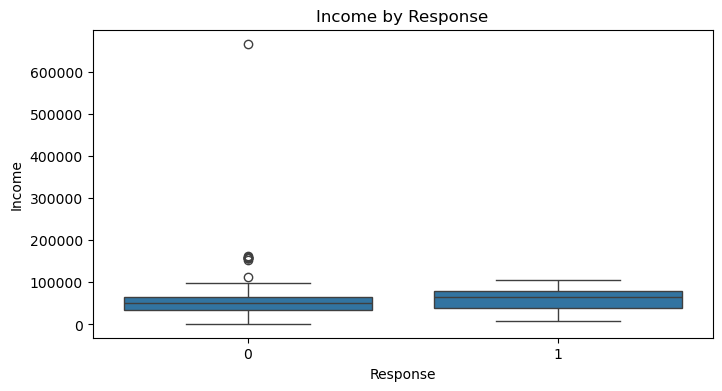

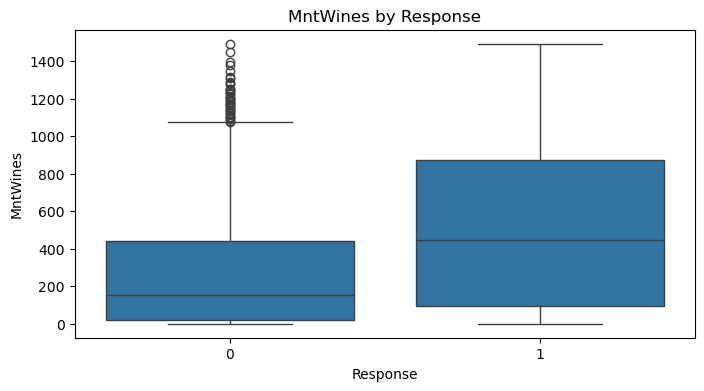

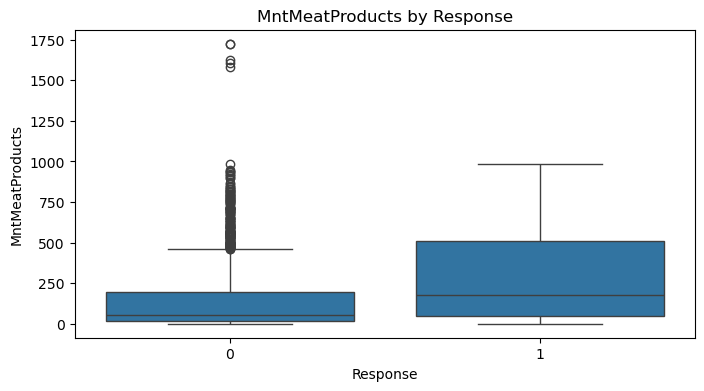

In [7]:
#Boxplots to identify outliers by Response
for col in ['Income', 'MntWines', 'MntMeatProducts']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Response', y=col, data=df)
    plt.title(f"{col} by Response")
    plt.show()


In [8]:
#Feature Insights Summary
feature_summary = pd.DataFrame({
    'Feature': numeric_cols.tolist(),
    'Data_Type': [df[f].dtype for f in numeric_cols],
    'Correlation_with_Response': [corr[f]['Response'] for f in numeric_cols]
})

feature_summary = feature_summary.sort_values(by='Correlation_with_Response', ascending=False)
feature_summary


,Feature,Data_Type,Correlation_with_Response
25,Response,int64,1.000000
19,AcceptedCmp5,int64,0.328182
20,AcceptedCmp1,int64,0.293882
17,AcceptedCmp3,int64,0.254144
6,MntWines,int64,0.247392
8,MntMeatProducts,int64,0.236640
14,NumCatalogPurchases,int64,0.220894
27,Recency_Months,int64,0.194542
18,AcceptedCmp4,int64,0.176890
21,AcceptedCmp2,int64,0.169249


In [9]:
#Top 5 Features by Correlation with Response
print("=== Top Features Most Correlated with Response ===")
response_corr = df[numeric_cols].corr()['Response'].drop('Response')
response_corr_sorted = response_corr.abs().sort_values(ascending=False)
top_n = 5
print(f"\nTop {top_n} features positively or negatively correlated with Response:")
for i, (feature, corr_val) in enumerate(response_corr_sorted.head(top_n).items(), 1):
    direction = "positive" if response_corr[feature] > 0 else "negative"
    print(f"{i}. {feature}: {response_corr[feature]:.3f} ({direction} correlation)")


=== Top Features Most Correlated with Response ===

Top 5 features positively or negatively correlated with Response:
1. AcceptedCmp5: 0.328 (positive correlation)
2. AcceptedCmp1: 0.294 (positive correlation)
3. AcceptedCmp3: 0.254 (positive correlation)
4. MntWines: 0.247 (positive correlation)
5. MntMeatProducts: 0.237 (positive correlation)


In [ ]:
# Next Steps / Observations
### 1. Categorical Features
- Most categories look reasonable in terms of counts, though `Dt_Customer` has too many unique values to plot nicely.
- Might want to group some categories or simplify them if needed to use them in modeling.
- `Education` and `Marital_Status` are already categorical, which is good.

### 2. Dates / Time Features
- `Dt_Customer` has a lot of unique dates, but the distribution seems consistent over time.
- Could derive features like customer tenure in months or years; already have `Recency_Months`.
- No obvious missing values here after conversion.

### 3. Numeric Feature Correlations
- `AcceptedCmp` columns and `MntWines`, `MntMeatProducts`, etc., show moderate positive correlation with `Response`.
- Features like `Teenhome` and `Recency` are weakly or negatively correlated - might still be useful in models, but probably lower predictive power.
- `Z_CostContact` and `Z_Revenue` are NaN in the correlation - probably constants or not useful.

### 4. Outliers
- Most numeric features have a few outliers; `MntSweetProducts`, `MntFruits`, `MntFishProducts`, and `Response` have higher percentages of outliers.
- For tree-based models, might leave them as-is. For linear models, consider capping or transforming.
- No outliers in `Age` or `Recency_Months`, which is reassuring.

### 5. Grouped Means by Response
- Customers who responded (`Response=1`) tend to spend more across most product categories (`MntWines`, `MntMeatProducts`, etc.).
- They also have slightly higher `Income` and fewer kids/teens at home.
- Recency is lower for responders - makes sense as more recent customers are more engaged.

### Overall Thoughts
- Key areas to consider for next steps:
  1. Transform or cap skewed numeric features if using linear models.
  2. Possibly create aggregated features (total spending, total kids, etc.).
  3. Encode categorical variables for modeling.
  4. Explore interactions between `AcceptedCmp` campaigns and spending.
  5. Start experimenting with simple classification models (Logistic Regression, Random Forest) to see baseline performance.